<a href="https://colab.research.google.com/github/Reape4er/neural_network/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [ ]:
import pandas as pd
import numpy as np

data_url = "https://github.com/meet-sapu/BOSTON-DATASET/raw/refs/heads/master/boston%20dataset/boston.xls"
raw_df = pd.read_excel(data_url, header=0)
data = raw_df.iloc[:,:-1]
target = raw_df["MV"]


In [ ]:
display(pd.DataFrame(data))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [ ]:
target

,MV
0,24.000000
1,21.600000
2,34.700001
3,33.400002
4,36.200001
...,...
501,22.400000
502,20.600000
503,23.900000
504,22.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()  # Стандартизация по среднему и стандартному отклонению
# scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

#### 1.2. Проектируем архитектуру для этой задачи

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Dense(64, input_shape=(13,), activation='relu'),
    Dense(32,  activation='relu'),
    Dense(16,  activation='relu'),
    Dense(8,  activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [ ]:
## Параметры обучения
INIT_LR = 0.0001
EPOCHS = 80

opt = Adam(learning_rate=INIT_LR)
model.compile(loss="MSE", optimizer=opt, metrics=["MAE"])

#### 1.4. Обучаем модель ИНС

In [ ]:
H = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS, batch_size=16
)

Epoch 1/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MAE: 2.6324 - loss: 13.1707 - val_MAE: 3.6423 - val_loss: 29.7231
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 2.4996 - loss: 12.0779 - val_MAE: 3.6286 - val_loss: 29.6531
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 2.4897 - loss: 11.6594 - val_MAE: 3.6179 - val_loss: 29.6233
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 2.4674 - loss: 11.5009 - val_MAE: 3.6040 - val_loss: 29.3833
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 2.4931 - loss: 12.8495 - val_MAE: 3.5968 - val_loss: 29.1229
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 2.3107 - loss: 9.8899 - val_MAE: 3.5847 - val_loss: 29.1040
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 2.5295 - loss: 12.0783 - val_MAE: 3.5728 - val_loss: 28.8820
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 2.4495 - loss: 11.4991 - val_MAE: 3.5627 - val_loss: 29.0496
Epoch 9/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 

#### 1.6. Делаем предсказания на тестовых данных

In [ ]:
preds = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [ ]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(preds, y_test))

NameError: name 'preds' is not defined

#### 1.8. Строим график обучения

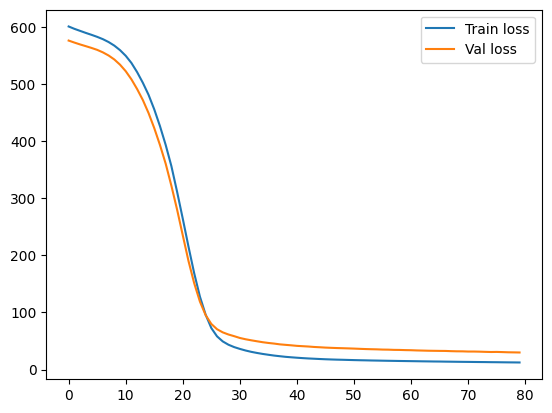

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(H.history['loss'], label='Train loss')
plt.plot(H.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

In [ ]:
def preprocess_input(features, scale_model="scaler.pkl"):

  """
  Функция преобразует входные данные в формат,
  подходящий для модели машинного обучения.

  Args:
      features: Список или массив с входными признаками.
      scale_model: Путь к файлу с сохраненной моделью масштабирования.

  Returns:
      Преобразованный массив признаков.
  """

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0]}"

In [ ]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(minimum=0, maximum=100, step=0.1, label="CRIM (per capita crime rate by town)"),
        gr.Slider(minimum=0, maximum=100, step=0.1, label="ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)"),
        gr.Slider(minimum=0, maximum=100, step=0.1, label="INDUS (proportion of non-retail business acres per town)"),
        gr.Slider(minimum=0, maximum=1, step=1, label="CHAS (Charles River dummy variable)"),
        gr.Slider(minimum=0, maximum=1, step=0.01, label="NOX (nitric oxides concentration)"),
        gr.Slider(minimum=3, maximum=9, step=0.1, label="RM (average number of rooms per dwelling)"),
        gr.Slider(minimum=0, maximum=100, step=0.1, label="AGE (proportion of owner-occupied units built prior to 1940)"),
        gr.Slider(minimum=1, maximum=12, step=0.1, label="DIS (weighted distances to five Boston employment centres)"),
        gr.Slider(minimum=1, maximum=24, step=1, label="RAD (index of accessibility to radial highways)"),
        gr.Slider(minimum=100, maximum=1000, step=10, label="TAX (full-value property-tax rate per $10,000)"),
        gr.Slider(minimum=12, maximum=23, step=0.1, label="PTRATIO (pupil-teacher ratio by town)"),
        gr.Slider(minimum=0, maximum=400, step=1, label="B (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)"),
        gr.Slider(minimum=0, maximum=100, step=0.1, label="LSTAT (% lower status of the population)"),
    ],
    outputs=gr.Text(label="Predicted Price ($)"),
    title="Предсказание MEDV (Median value of owner-occupied homes)",
    description="Введите значения для каждого параметра, чтобы предсказать MEDV."
)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://33cd83fa9dc53e0ea9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#### 2. Проверка обученной модели пользовательскими данными

In [ ]:
# Запуск интерфейса
interface.launch(debug=False, share=True)

## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [ ]:
!unzip archive.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/r

### 3. Указываем путь к набору данных:

In [ ]:
# Загрузка и подготовка данных
imagePaths = sorted(list(paths.list_images("raw-img")))
random.shuffle(imagePaths)

data, labels_str = [], []

for imagePath in imagePaths:
    try:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (64, 64)).flatten()
        data.append(image)
        # Извлекаем строковую метку из названия папки
        label = imagePath.split(os.path.sep)[-2]
        labels_str.append(label)
    except:
        continue

data = np.array(data, dtype="float") / 255.0
labels_str = np.array(labels_str)

In [ ]:
# Создаем объект LabelBinarizer
lb = LabelBinarizer()

# Преобразуем строковые метки в бинарный формат
binary_labels = lb.fit_transform(labels_str)

# Выводим результат
print(binary_labels.shape)
print(binary_labels)
display(binary_labels)

(26179, 10)
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
print(len(imagePaths))

26179


#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, binary_labels, test_size=0.2, random_state=0)


### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
# Создаём модель
model_img = Sequential()
model_img.add(Dense(1024, input_shape=(12288,), activation="relu"))
model_img.add(Dense(512, activation="relu"))
model_img.add(Dense(1024, activation="relu"))
model_img.add(Dense(10, activation="softmax"))

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
# Параметры обучения
INIT_LR = 0.0001
EPOCHS = 80


#### 5.3. Компилируем модель:

In [ ]:

opt = Adam(learning_rate=INIT_LR)
model_img.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Callback для сохранения модели после каждой эпохи
checkpoint = ModelCheckpoint('model-{val_loss}.h5', save_best_only=True, monitor='val_loss', mode='min')

# Callback для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

callbacks_list = [checkpoint, early_stopping]

#### 6.2. Запустим процесс обучения модели:

In [ ]:
H = model_img.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS, batch_size=32,
    callbacks=callbacks_list
)

Epoch 1/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6147 - loss: 1.1466 - val_accuracy: 0.4251 - val_loss: 1.7405
Epoch 2/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6312 - loss: 1.0968 - val_accuracy: 0.4389 - val_loss: 1.7276
Epoch 3/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6393 - loss: 1.0627 - val_accuracy: 0.4318 - val_loss: 1.8180
Epoch 4/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6677 - loss: 0.9902 - val_accuracy: 0.4299 - val_loss: 1.8720
Epoch 5/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6896 - loss: 0.9362 - val_accuracy: 0.4358 - val_loss: 1.8595
Epoch 6/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.8820 - val_accuracy: 0.4333 - val_loss: 1.8743
Epoch 7/80
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7223 - loss: 0.8289 - val_accuracy: 0.4460 - val_loss: 1.8680


#### 6.3. Загружаем лучшую модель:

In [ ]:
from tensorflow.keras.models import load_model
model_img = load_model('model-1.70155.h5')  # Загрузить модель

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
print(y_test)
print(labels_str)
print(preds)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
['ragno' 'gallina' 'gallina' ... 'ragno' 'gallina' 'cavallo']


NameError: name 'preds' is not defined

In [ ]:
# Шаг 6: Оценка модели
preds = model_img.predict(X_test, batch_size=32)

# В classification_report передаём target_names=unique_labels
print(classification_report(
    y_test.argmax(axis=1),
    preds.argmax(axis=1),
    target_names=np.unique(labels_str) ))

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

        cane       0.42      0.31      0.35       928
     cavallo       0.44      0.51      0.47       560
    elefante       0.31      0.14      0.19       276
    farfalla       0.47      0.26      0.33       400
     gallina       0.45      0.35      0.39       648
       gatto       0.27      0.26      0.27       340
       mucca       0.34      0.35      0.35       365
      pecora       0.33      0.43      0.37       382
       ragno       0.43      0.77      0.55       957
  scoiattolo       0.27      0.09      0.14       380

    accuracy                           0.40      5236
   macro avg       0.37      0.35      0.34      5236
weighted avg       0.39      0.40      0.38      5236



#### 7.2. Выведем матрицу ошибок

In [ ]:
# Ваш код

#### 7.3. Отобразим график обучения

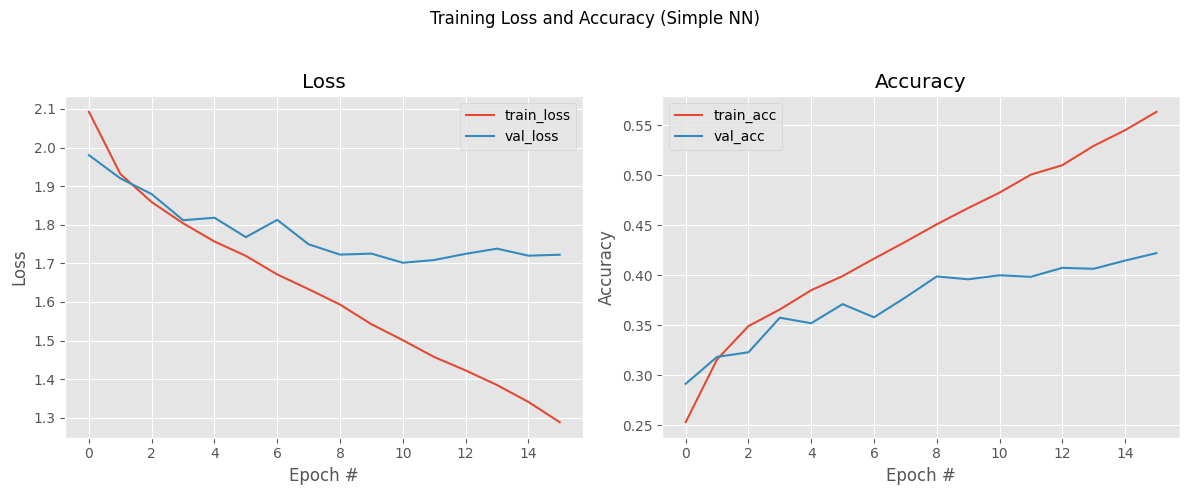

In [ ]:
# Построение графиков потерь и точности в двух соседних графиках
epochs_range = np.arange(0, 16)
plt.style.use("ggplot")

# Создаем фигуру с 1 строкой и 2 столбцами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# График потерь (loss)
ax1.plot(epochs_range, H.history["loss"], label="train_loss")
ax1.plot(epochs_range, H.history["val_loss"], label="val_loss")
ax1.set_title("Loss")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()

# График точности (accuracy)
ax2.plot(epochs_range, H.history["accuracy"], label="train_acc")
ax2.plot(epochs_range, H.history["val_accuracy"], label="val_acc")
ax2.set_title("Accuracy")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Добавляем общий заголовок и корректируем отступы
plt.suptitle("Training Loss and Accuracy (Simple NN)")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

### 8. Сохранение модели и меток классов:

In [ ]:
model_img.save('my_model.h5')  # Сохранить модель
import pickle

# Сохранение меток классов
with open('class_labels.pkl', 'wb') as f:
    pickle.dump(labels_str, f)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import pickle



#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
import tensorflow as tf

model_img = tf.keras.models.load_model('my_model.h5')
with open('class_labels.pkl', 'rb') as f:
    class_labels = pickle.load(f)

In [ ]:
from PIL import Image
def preprocess_image (image):
  # Преобразование в массив NumPy (RGB)
  image_np = np.array(image)
  print(image_np.shape)
  print(image_np)
  # Преобразование RGB в BGR
  image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
  image = cv2.resize(image, (64, 64)).flatten() / 255.0

  return image


#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
def predict_image(img):
    try:
        # Преобразование изображения в массив NumPy
        img_array = np.array(img)

        # Изменение размера изображения (если необходимо)
        img_array = cv2.resize(img_array, (64, 64))  # Пример: изменение размера до 64x64
        print(img_array.shape)
        # Нормализация (если требуется)
        img_array = img_array / 255.0

        # Расплющивание изображения
        img_array = img_array.reshape(1, -1)  # Преобразуем в форму (1, 12288)

        # Предсказание
        predictions = model_img.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_label = labels_str[predicted_class_index]

        return predicted_class_label
    except Exception as e:
        print(f"Ошибка: {e}")
        raise

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Создание интерфейса Gradio
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy"),  # Убедитесь, что тип входных данных - numpy
    outputs=gr.Label(num_top_classes=3),
    live=True,
    title="Классификация изображений",
    description="Загрузите изображение, и модель предскажет его класс."
)

# Запуск интерфейса
interface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://baf77c895389cc172d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


(64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://baf77c895389cc172d.gradio.live
